# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/CLV.csv")

In [4]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [5]:
print(df.dtypes)

Unnamed: 0                          int64
Customer Lifetime Value           float64
Income                              int64
Number of Policies                  int64
Total Claim Amount                float64
Months Since Last Claim             int64
Vehicle Size_Large                  int64
Vehicle Size_Medsize                int64
Gender_M                            int64
EmploymentStatus_Employed           int64
EmploymentStatus_Medical Leave      int64
EmploymentStatus_Retired            int64
EmploymentStatus_Unemployed         int64
Policy Type_Corporate Auto          int64
Policy Type_Personal Auto           int64
Marital Status_Divorced             int64
Marital Status_Married              int64
Marital Status_Single               int64
dtype: object


In [6]:
X = df.drop('Customer Lifetime Value', axis = 1)
y = df['Customer Lifetime Value']

In [ ]:
#X = pd.get_dummies(X)
# no longer need this

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
# Scale the input variables using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




X_scaled = scaler.fit_transform(X)

# Encode the output variable using LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor



clf = MLPRegressor()


In [13]:
# Define the hyperparameter grid to search over
params = {'hidden_layer_sizes': [(10,), (50,), (25,), (7,19), (22,5,)],
          'activation': ['relu'],
          "alpha" : [0.001, 0.01]


}

In [14]:
# Create a GridSearchCV object with 10-fold cross-validation
grid_search = GridSearchCV(clf, params, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Best parameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (7, 19)}
Best score:  0.049079772459988756


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Best parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (7, 19)}
#Best score:  0.049079772459988756

# 3.) Train a model with the optimal solution from GridSearch

In [15]:
# Create an MLPRefressor object with OPTIMAL PARAMTERS
regressor = MLPRegressor(hidden_layer_sizes=(7, 19), activation = 'relu', alpha = 0.01)

# Fitting MLPRefressor on my scaled training set
regressor.fit(X_train, y_train)


#Making predictions on the scaled test data
y_pred = regressor.predict(X_test)



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 4.) What are the in-sample and out of sample MSEs

In [16]:
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LinearRegression

In [17]:
# Train a  regression model on the training data
model = MLPRegressor()
model.fit(X_train, y_train)

# Predict the target values for both the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the in-sample and out-of-sample MSEs
in_sample_mse = mean_squared_error(y_train, y_train_pred)
out_of_sample_mse = mean_squared_error(y_test, y_test_pred)

print("In-sample MSE: {:.2f}".format(in_sample_mse))
print("Out-of-sample MSE: {:.2f}".format(out_of_sample_mse))

In-sample MSE: 46928024.80
Out-of-sample MSE: 46781175.44


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [18]:
# Packages 

import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [19]:
#Create architecture using OPTIMAL PARAMTERS
model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(1, activation = "softmax"))


In [20]:
#Train Model

model.compile(loss='mse', optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=32, epochs = 1)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


200/200 [==============================] - 1s 2ms/step - loss: 111726632.0000


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [21]:
!pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=ff266c2859dff0ebde5eb0e49d2ece3a2e1013dbc98ca8e6206b7f9a0a76110b
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer


In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

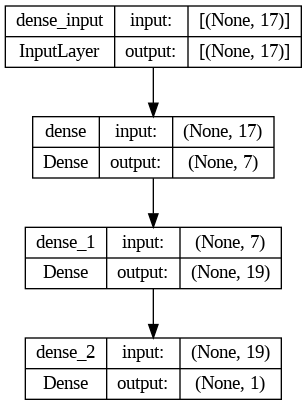

In [23]:
# Create a simple neural network model
#model = Sequential()
#model.add(Dense(7, input_dim=X_train.shape[1], activation = "relu"))
#model.add(Dense(19, activation = "relu"))
#model.add(Dense(1, activation = "softmax")

# Visualize the model using plot_model
plot_model(model, show_shapes=True)




In [24]:
from ann_visualizer.visualize import ann_viz

In [25]:
ann_viz(model, view=True, filename = "model.gv")

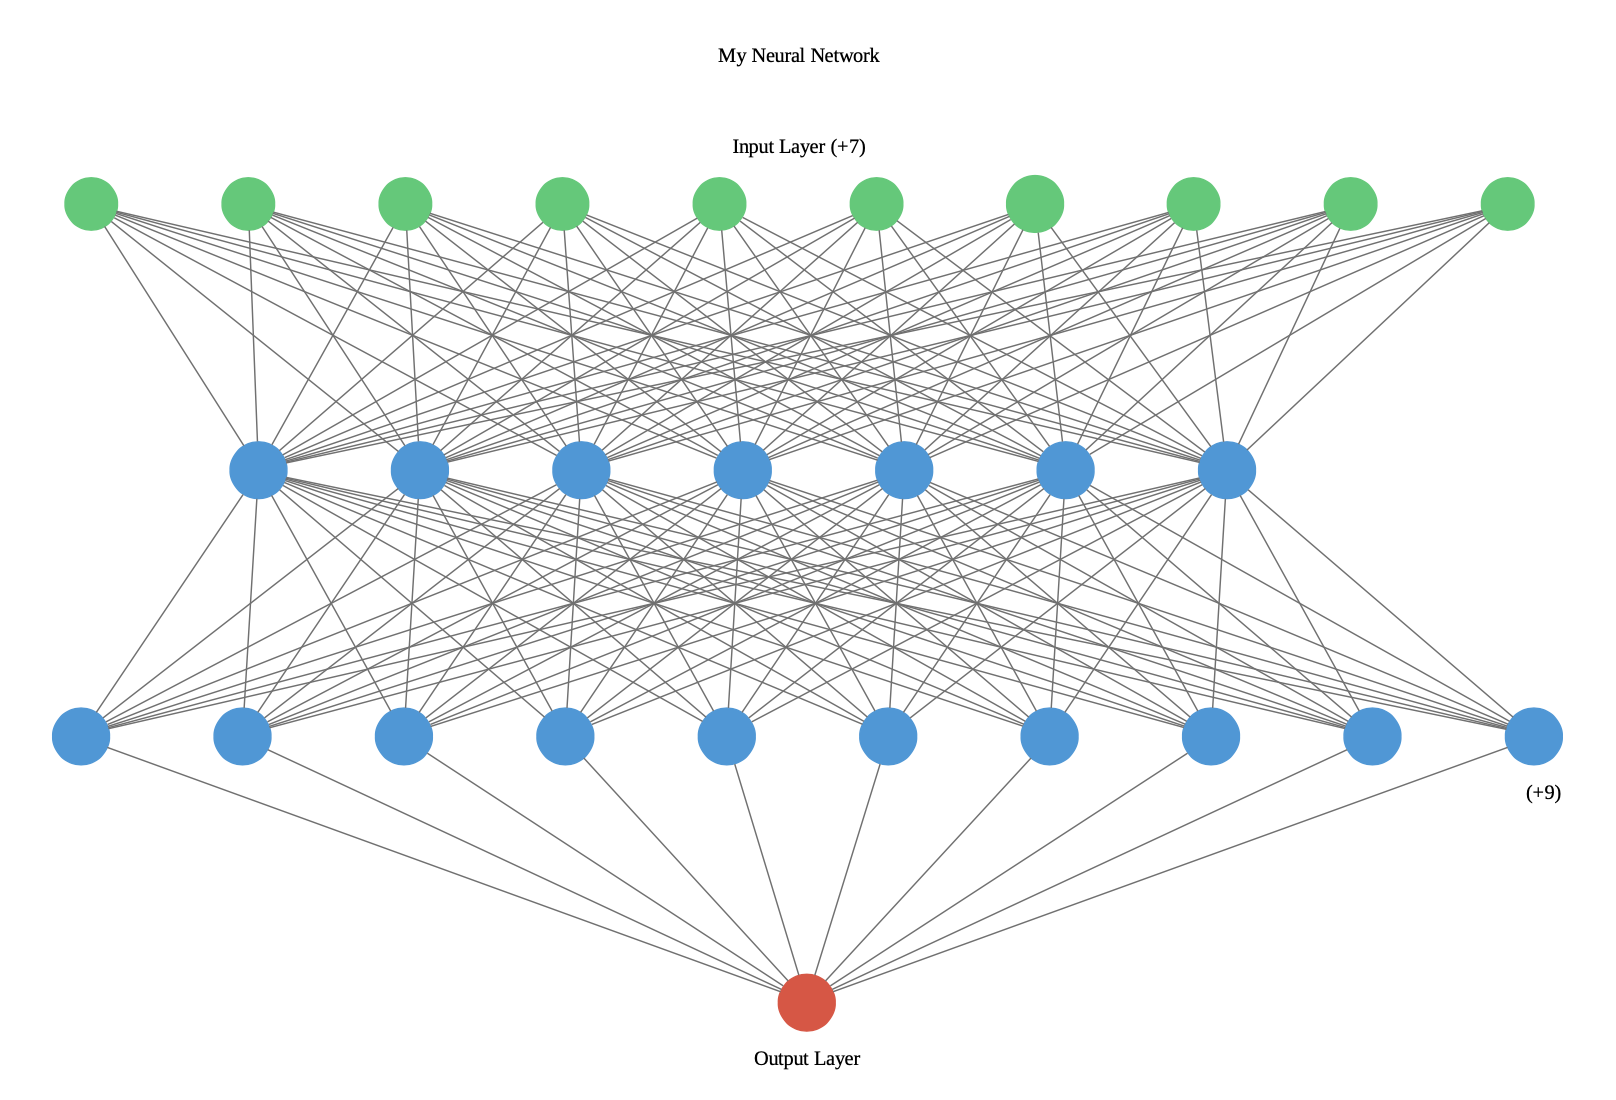